# Clase 4. Preparación de datos. Sección 2. Caracterización de variables

Este cuaderno contiene los ejemplos de la sección 2 en python/SKLearn que acompañan a la [presentación de la clase](https://docs.google.com/presentation/d/1lBF-w7pShz5fd4-LQZvsIUnHJwPomvdqlVNyKYM9Q-M/edit?usp=sharing).

**Ejemplos**:

1. Datos faltantes.
2. Consideraciones al trabajar con ariables categóricas.
3. Supuestos de linealidad.
4. Distribución.
5. Valores extremos.
6. Magnitud/escala.

In [1]:
%load_ext autoreload
%autoreload 2

# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Escalado de features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Esquemas de entrenamiento
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score

np.random.seed(42)

# Versiones de librerías
print("".join(f"{x[0]}:{x[1]}\n" for x in [
    ("Pandas",pd.__version__),
    ("Numpy",np.__version__),
    ("Matplotlib",matplotlib.__version__),
    ("SKlearn",sklearn.__version__),
    ("Seaborn",sns.__version__)
]))

Pandas:0.24.2
Numpy:1.15.4
Matplotlib:3.0.3
SKlearn:0.24.1
Seaborn:0.9.0



Datasets.

In [2]:
DATASET_PATH="./data"
!ls {DATASET_PATH}

 COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx
 houseprices.csv
'NSIT Dwarka.csv'
 subset-covid-data.csv
 titanic.csv


## Preparación de datos

Carga de datasets utilizados para ejemplos.

Funcion de utilería para mostrar distribuciones.

In [3]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

**Dataset 1) Precios de propiedades**

Fuente: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [4]:
df_houseprice = pd.read_csv(DATASET_PATH+"/houseprices.csv")
df_houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


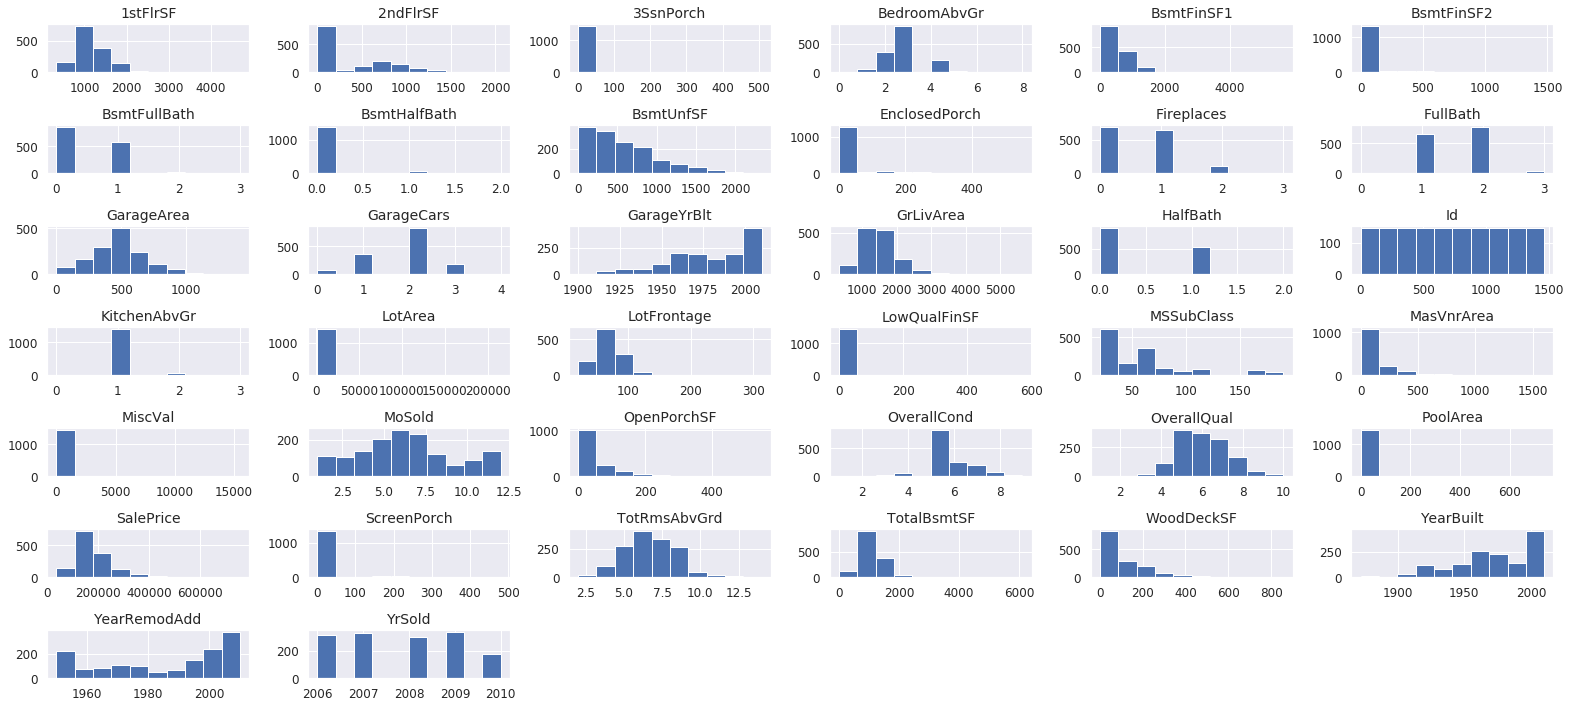

In [5]:
display_dataset_distributions(df_houseprice)

**Dataset 2) Titanic**

Fuente: https://www.kaggle.com/c/titanic

In [6]:
df_titanic = pd.read_csv(DATASET_PATH+"/titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


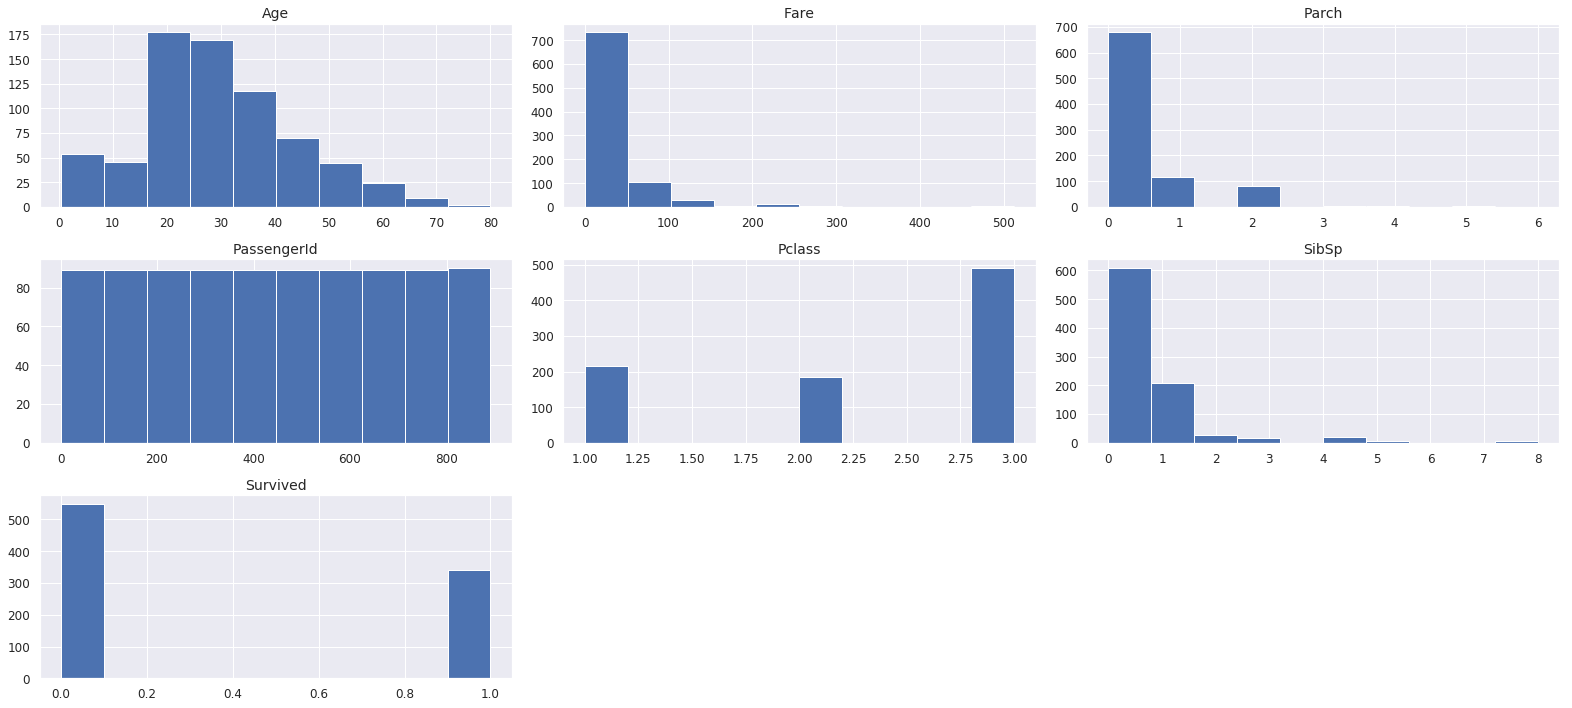

In [7]:
display_dataset_distributions(df_titanic)

## 2. Caracterización de variables

- Datos faltantes.
- Consideraciones al trabajar con ariables categóricas.
- Supuestos de linealidad.
- Distribución.
- Valores extremos.
- Magnitud/escala.

#### 2.1 Datos faltantes

Contar valores faltantes para cada variable (ejemplo con Titanic).

In [8]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing data Not At Random (MNAR)** (ejemplo con Titanic)

Mucha de la información disponible del titanic fue reconstruida por aportes de los sobrevivientes, por lo tanto una hipótesis a testear es que puedan haber más datos faltantes para los no-sobrevivientes. 

Pregunta: Tomando como ejemplos la edad y el camarote ('Age' y 'Cabin') ¿Existe una relación entre los NA de estas variables y si ese pasajero sobrevivió?

In [9]:
df_titanic['Cabin'].isnull().groupby(df_titanic['Survived']).count()

Survived
0    549
1    342
Name: Cabin, dtype: int64

In [10]:
df_titanic['Cabin'].isnull().groupby(df_titanic['Survived']).count()/len(df_titanic['Cabin'].isnull())

Survived
0    0.616162
1    0.383838
Name: Cabin, dtype: float64

In [11]:
df_titanic['Age'].isnull().groupby(df_titanic['Survived']).count()/len(df_titanic['Age'].isnull())

Survived
0    0.616162
1    0.383838
Name: Age, dtype: float64

**Missing data Completely At Random (MCAR)**

Dos pasajeros aparentemente similares.

In [12]:
df_titanic[df_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 2.2 Consideraciones al trabajar con ariables categóricas. Problemas relacionados con la cardinalidad.

Ejemplo de baja cardinalidad.

In [13]:
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
df_titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Ejemplo de alta cardinalidad.

In [14]:
df_titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Para ilustrar el problema de tener alta cardinalidad se entrenará un modelo con todos los valores posibles de cabin y luego una versión reducida.

- La versión reducida considera sólo la primer letra (los camarotes están organizados por sector). Más info: https://www.encyclopedia-titanica.org/cabins.html

In [15]:
# Sólo tomar la primer letra del camarote, indicando el sector
df_titanic['cabin_red'] = df_titanic['Cabin'].astype(str).str[0]
df_titanic[['Cabin', 'cabin_red']].head()

,Cabin,cabin_red
0,NaN,n
1,C85,C
2,NaN,n
3,C123,C
4,NaN,n


Separación en train set y test set, incluyendo la nueva variable reducida de 'Cabin'.

In [16]:
use_cols = ['Cabin', 'cabin_red', 'Sex']
X_train, X_test, y_train, y_test = train_test_split(
    df_titanic[use_cols], 
    df_titanic['Survived'],  
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 3), (268, 3))

**Problema 1**: No todas las categorías de train set están en test set.

Para la variable original.

In [17]:
unique_to_train_set = [
    x for x in X_train.Cabin.unique() if x not in X_test.Cabin.unique()
]

unique_to_test_set = [
    x for x in X_test.Cabin.unique() if x not in X_train.Cabin.unique()
]

print("Etiquetas de 'Cabin' halladas sólo en train set:",len(unique_to_train_set))
print("Etiqueteas de 'Cabin' halladas sólo en test set:",len(unique_to_test_set))

Etiquetas de 'Cabin' halladas sólo en train set: 100
Etiqueteas de 'Cabin' halladas sólo en test set: 28


Para la variable reducida.

In [18]:
unique_to_train_set = [
    x for x in X_train.cabin_red.unique() if x not in X_test.cabin_red.unique()
]

unique_to_test_set = [
    x for x in X_test.cabin_red.unique() if x not in X_train.cabin_red.unique()
]

print("Etiquetas de 'cabin_red' halladas sólo en train set:",len(unique_to_train_set))
print("Etiqueteas de 'cabin_red' halladas sólo en test set:",len(unique_to_test_set))

Etiquetas de 'cabin_red' halladas sólo en train set: 1
Etiqueteas de 'cabin_red' halladas sólo en test set: 0


Conclusión: haber reducido la cardinalidad agrupando en menor cantidad de categorías que contengan más observaciones, disminuyó la probabilidad de tener categorías que sólo están en uno de los dos sets (train o test).

**Problema 2**: Desempeño de modelos.

A continuación se entrenarán dos modelos, uno utilizando la variable original y otro la variable reducida.

Se hará una codificación sencilla que consiste en reemplazar categorías por números (nota: esté método es sólo para este ejemplo, esto más adelante se hará utilizando librerías, ej: con *OrdinalEncoder*).

In [19]:
# Diccionario Categoría -> Código
cabin_dict = {k: i for i, k in enumerate(X_train.Cabin.unique(), 0)}
cabin_dict

{'E17': 0,
 'D33': 1,
 nan: 2,
 'D26': 3,
 'B58 B60': 4,
 'C128': 5,
 'D17': 6,
 'A14': 7,
 'F33': 8,
 'B19': 9,
 'D21': 10,
 'C148': 11,
 'C30': 12,
 'D56': 13,
 'E24': 14,
 'E40': 15,
 'E31': 16,
 'E44': 17,
 'E38': 18,
 'D37': 19,
 'E8': 20,
 'C92': 21,
 'E63': 22,
 'C125': 23,
 'F4': 24,
 'E67': 25,
 'C126': 26,
 'B73': 27,
 'E36': 28,
 'C78': 29,
 'E46': 30,
 'C111': 31,
 'E101': 32,
 'D15': 33,
 'E12': 34,
 'G6': 35,
 'A32': 36,
 'B4': 37,
 'A10': 38,
 'A5': 39,
 'C95': 40,
 'E25': 41,
 'C90': 42,
 'D6': 43,
 'A36': 44,
 'D': 45,
 'D50': 46,
 'B96 B98': 47,
 'C93': 48,
 'E77': 49,
 'C101': 50,
 'D11': 51,
 'C123': 52,
 'C32': 53,
 'B35': 54,
 'C91': 55,
 'T': 56,
 'B101': 57,
 'E58': 58,
 'A23': 59,
 'B77': 60,
 'D28': 61,
 'B82 B84': 62,
 'B79': 63,
 'C45': 64,
 'C2': 65,
 'B5': 66,
 'C104': 67,
 'B20': 68,
 'A19': 69,
 'B51 B53 B55': 70,
 'B80': 71,
 'B38': 72,
 'B22': 73,
 'B18': 74,
 'C22 C26': 75,
 'A16': 76,
 'F2': 77,
 'D47': 78,
 'E121': 79,
 'C23 C25 C27': 80,
 'B28': 81

In [20]:
# Codificación para la versión no reducida.
X_train.loc[:, 'cabin_mapped'] = X_train.loc[:, 'Cabin'].map(cabin_dict)
X_test.loc[:, 'cabin_mapped'] = X_test.loc[:, 'Cabin'].map(cabin_dict)
X_train[['Cabin','cabin_mapped']].head(10)

,Cabin,cabin_mapped
857,E17,0
52,D33,1
386,NaN,2
124,D26,3
578,NaN,2
549,NaN,2
118,B58 B60,4
12,NaN,2
157,NaN,2
127,NaN,2


In [21]:
# Lo mismo para la versión reducida.
cabin_red_dict = {k: i for i, k in enumerate(X_train['cabin_red'].unique(), 0)}
cabin_red_dict

{'E': 0, 'D': 1, 'n': 2, 'B': 3, 'C': 4, 'A': 5, 'F': 6, 'G': 7, 'T': 8}

In [22]:
X_train.loc[:, 'cabin_mapped_red'] = X_train.loc[:, 'cabin_red'].map(cabin_red_dict)
X_test.loc[:, 'cabin_mapped_red'] = X_test.loc[:, 'cabin_red'].map(cabin_red_dict)
X_train[['Cabin','cabin_red','cabin_mapped_red']].head(20)

,Cabin,cabin_red,cabin_mapped_red
857,E17,E,0
52,D33,D,1
386,NaN,n,2
124,D26,D,1
578,NaN,n,2
549,NaN,n,2
118,B58 B60,B,3
12,NaN,n,2
157,NaN,n,2
127,NaN,n,2


Observar que en esta reducción dos camarotes del mismo sector (por ejemplo: E36 y E24) reciben la misma codificación (pérdida de información).

In [23]:
len(X_train.cabin_mapped.unique()), len(X_train.cabin_red.unique())

(121, 9)

Para poder entrenar con la variable Sex, es necesario codificarla tambien.

In [24]:
# Codificación de variable Sex
X_train.loc[:, 'Sex'] = X_train.loc[:, 'Sex'].map({'male': 0, 'female': 1})
X_test.loc[:, 'Sex'] = X_test.loc[:, 'Sex'].map({'male': 0, 'female': 1})

Chequeo de NAs.

In [25]:
print("NAs de Cabin en Train: ",np.sum(X_train.cabin_mapped.isnull()))
print("NAs de Cabin en Test: ",np.sum(X_test.cabin_mapped.isnull()))

NAs de Cabin en Train:  0
NAs de Cabin en Test:  30


In [26]:
print("NAs de Cabin en Train (reducido): ",np.sum(X_train.cabin_mapped_red.isnull()))
print("NAs de Cabin en Test (reducido): ",np.sum(X_test.cabin_mapped_red.isnull()))

NAs de Cabin en Train (reducido):  0
NAs de Cabin en Test (reducido):  0


In [27]:
print("NAs de Sex en Train (reducido): ",np.sum(X_train.Sex.isnull()))
print("NAs  de Sex en Test (reducido): ",np.sum(X_test.Sex.isnull()))

NAs de Sex en Train (reducido):  0
NAs  de Sex en Test (reducido):  0


Reemplazamos NAs con -1.

In [28]:
X_test.loc[X_test.cabin_mapped.isnull(),'cabin_mapped'] = -1
X_train.loc[X_train.Sex.isnull(),'Sex'] = -1
X_test.loc[X_test.Sex.isnull(),'Sex'] = -1

Entrnamiento de modelos.

In [29]:
# De la doc de SKlearn:
# Clone does a deep copy of the model in an estimator without actually copying attached data. 
# It yields a new estimator with the same parameters that has not been fitted on any data.
from sklearn.base import clone

# Modelos a ensayar.
models = [
    ("RandomForest", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=200, random_state=42)),
    ("LogistiRegression", LogisticRegression(random_state=42, solver='lbfgs'))
]

# Aquí almacenaremos los resultados.
results = {}

# Etrenamos cada modelo y almacenamos los resultados.
for m in models:

    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    # Versión sin reducir
    model.fit(X_train[['cabin_mapped', 'Sex']], y_train)
    pred_train = model.predict_proba(X_train[['cabin_mapped', 'Sex']].fillna(0))
    pred_test = model.predict_proba(X_test[['cabin_mapped', 'Sex']].fillna(0))
    
    results[model_name]["no_red_train"] = roc_auc_score(y_train, pred_train[:,1])
    results[model_name]["no_red_test"] =non_red_score_test = roc_auc_score(y_test, pred_test[:,1])
    
    # Versión reducida
    model = clone(m[1])
    model.fit(X_train[['cabin_mapped_red', 'Sex']], y_train)
    pred_train = model.predict_proba(X_train[['cabin_mapped_red', 'Sex']].fillna(0))
    pred_test = model.predict_proba(X_test[['cabin_mapped_red', 'Sex']].fillna(0))
    
    results[model_name]["red_train"] = roc_auc_score(y_train, pred_train[:,1])
    results[model_name]["red_test"] =non_red_score_test = roc_auc_score(y_test, pred_test[:,1])

df_results = pd.DataFrame(results).T
df_results

,no_red_test,no_red_train,red_test,red_train
RandomForest,0.815208,0.862774,0.833393,0.819901
AdaBoost,0.809375,0.839955,0.833214,0.819586
LogistiRegression,0.759107,0.809456,0.795774,0.767266


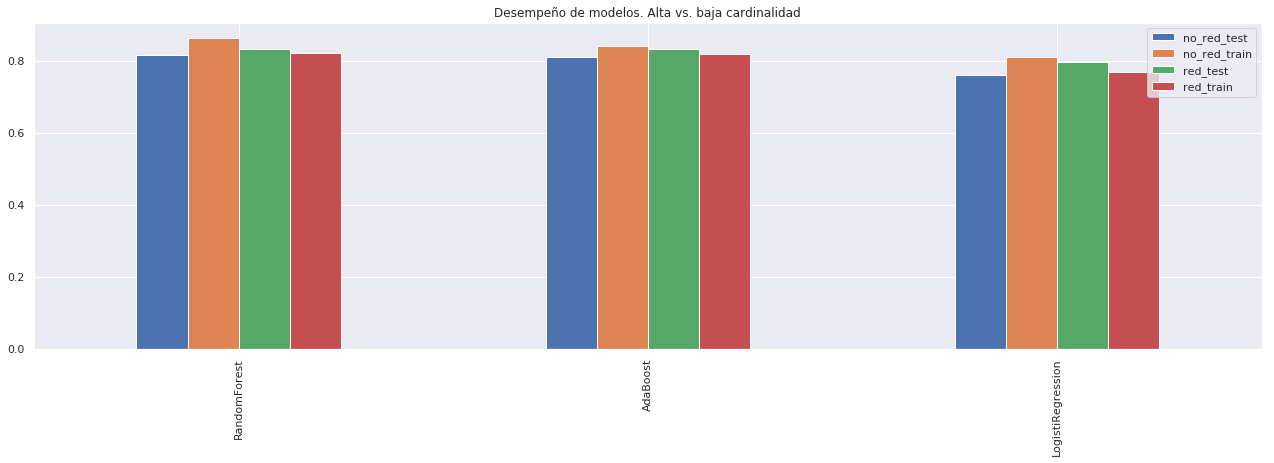

In [30]:
df_results.plot.bar(title="Desempeño de modelos. Alta vs. baja cardinalidad (AUC)",figsize=(22,6));

Observar la mejora del desempeño en Test Set (Mejor desempeño en Train y peor en Test = Overfitting!).

**Problema 3. Etiquetas raras**

En este ejemplo con el dataset de precios de propiedades, tomaremos 3 variables e intenteremos relacionarlas con el precio de venta.

- Neighborhood: barrio en que se encuentra la propiedad.
- Exterior1st: revestimiento exterior de la casa
- Exterior2nd: revestimiento exterior de la casa (si hay más de un material).

In [31]:
# Consideraremos sólo 3 variables
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('Variable: ', col, 'número de categorías: ', df_houseprice[col].nunique())

m = len(df_houseprice)
print('Total de observaciones: ', m)

Variable:  Neighborhood número de categorías:  25
Variable:  Exterior1st número de categorías:  15
Variable:  Exterior2nd número de categorías:  16
Total de observaciones:  1460


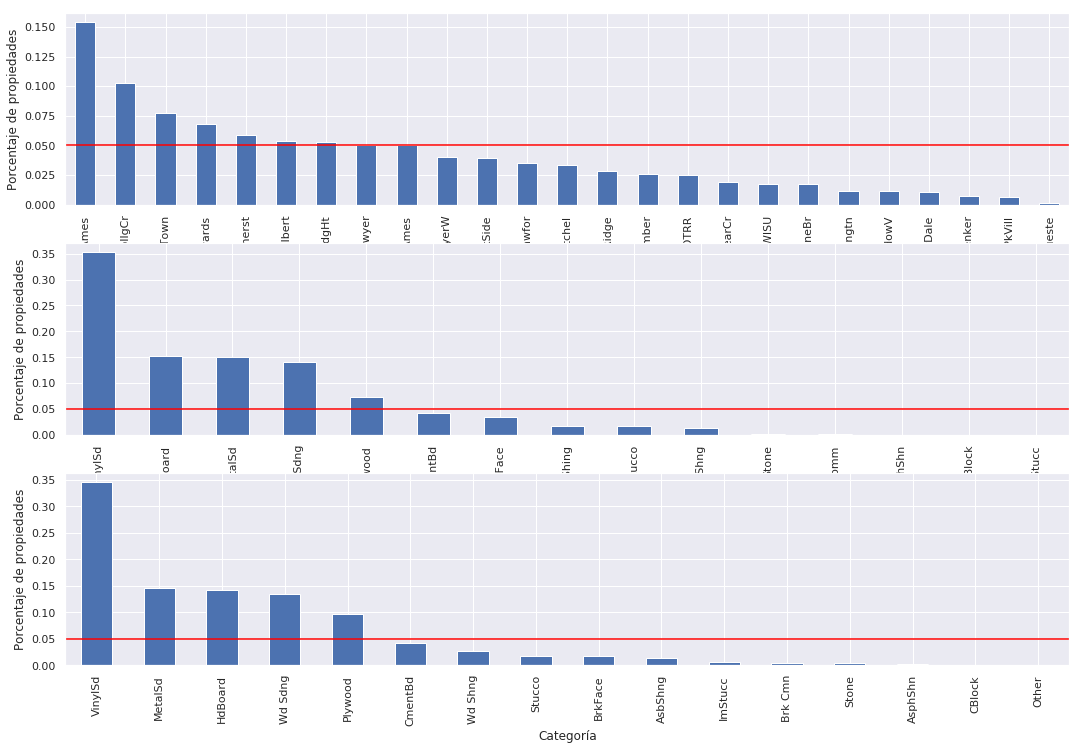

In [32]:
fig,axes = plt.subplots(len(cat_cols),1,figsize=(18,len(cat_cols)*4))
for i,col in enumerate(cat_cols):
    temp_df = pd.Series(df_houseprice[col].value_counts() / m)
    temp_df.sort_values(ascending=False).plot.bar(ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].axhline(y=0.05, color='red') # 5%
    axes[i].set_ylabel('Porcentaje de propiedades')
    axes[i].set_xlabel('Categoría')
plt.show()

Observamos que hay categorías que tienen muy baja representación en el dataset.

La siguiente función calcula el precio promedio de una propiedad dependiendo de su categoría.

In [33]:
def calculate_mean_target_per_category(df, var):
    m = len(df)
    temp_df = pd.Series(df[var].value_counts() / m).reset_index()
    temp_df.columns = [var, 'perc_houses']
    # precio promedio por categoría, left join sobre cada categoría
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),on=var,how='left')
    return temp_df

In [34]:
temp_df = calculate_mean_target_per_category(df_houseprice, 'Neighborhood')
temp_df.sort_values(by=['perc_houses'], ascending = False)

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


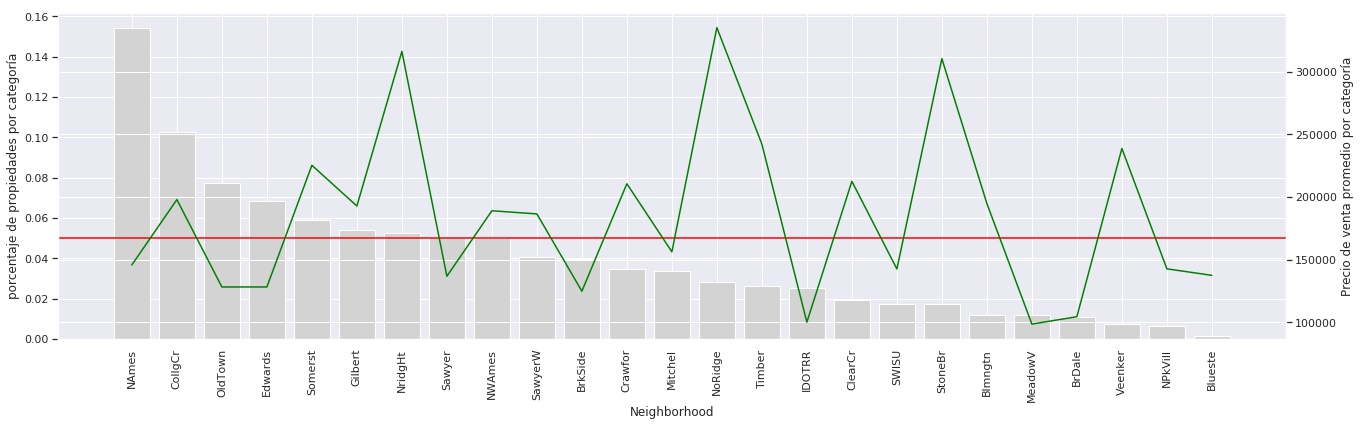

In [35]:
def plot_categories(df, var):
    fig, ax = plt.subplots(figsize=(22,6))
    plt.xticks(df.index, df[var], rotation=90)
    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('porcentaje de propiedades por categoría')
    ax.set_xlabel(var)
    ax2.set_ylabel('Precio de venta promedio por categoría')
    plt.show()
    
plot_categories(temp_df, 'Neighborhood')    

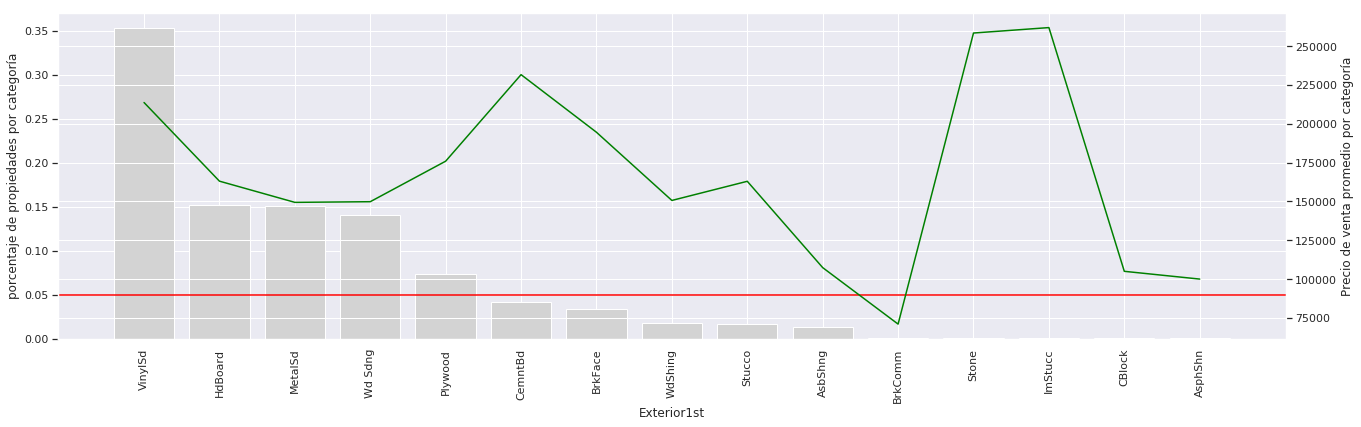

In [36]:
col = cat_cols[1]
temp_df = calculate_mean_target_per_category(df_houseprice, col)
plot_categories(temp_df, col)    

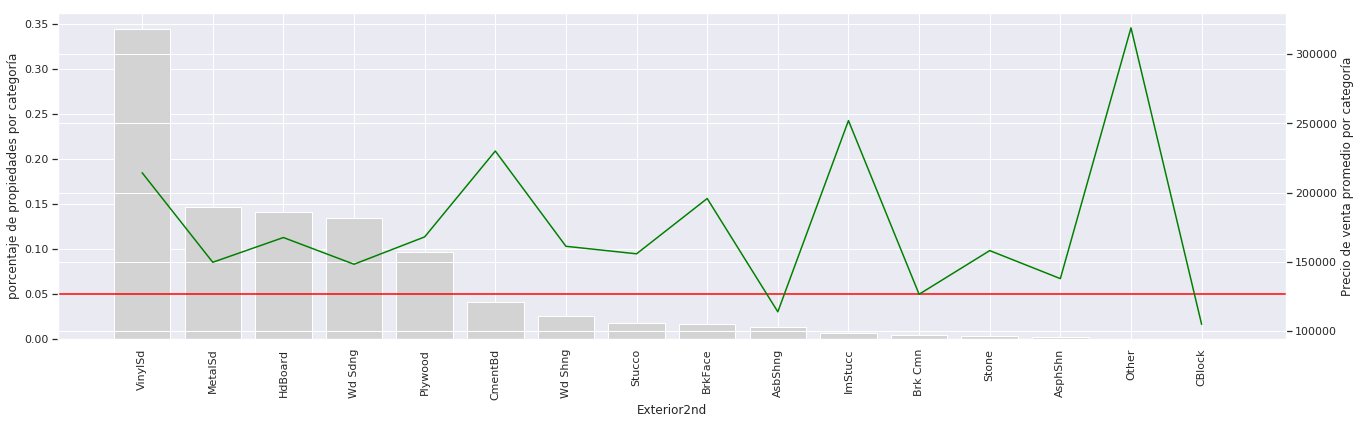

In [37]:
col = cat_cols[2]
temp_df = calculate_mean_target_per_category(df_houseprice, col)
plot_categories(temp_df, col)      

Observación:
- El problema aquí es que muchas de las categorías (y la mayoría en el tercer caso) están por debajo de 5% de las observaciones totales. ¿Qué tan bien puede generalizar nuestro modelo el precio promedio de venta en función de sus valores?

#### 2.3 Supuestos de linealidad

En este caso se utilizará el dataset de Boston de SKLearn:

~~~
In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price). https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

:Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
~~~ 

In [38]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# Variables independientes
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Variable objetivo
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
#print(boston_dataset.DESCR)

Para contar con un modelo lineal de referencia, se crea también una relación:

$$
y = \alpha X + \eta
$$

In [40]:
np.random.seed(42)
n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,0.496714,5.682716
1,-0.138264,-0.261074
2,0.647689,8.642988
3,1.523030,17.337903
4,-0.234153,-5.096872


##### 2.3.1 Relación lineal

Una forma de estudiar la linealidad es con un scatter plot para cada relación entre variables.
Para este ejemplo, supondremos que se quiere elaborar un modelo regresivo para MEDV en función de LSTAT, RM y CRIM.

X:
- LSTAT    % lower status of the population
- RM       average number of rooms per dwelling
- CRIM     per capita crime rate by town

Y:
- MEDV     Median value of owner-occupied homes in $1000's

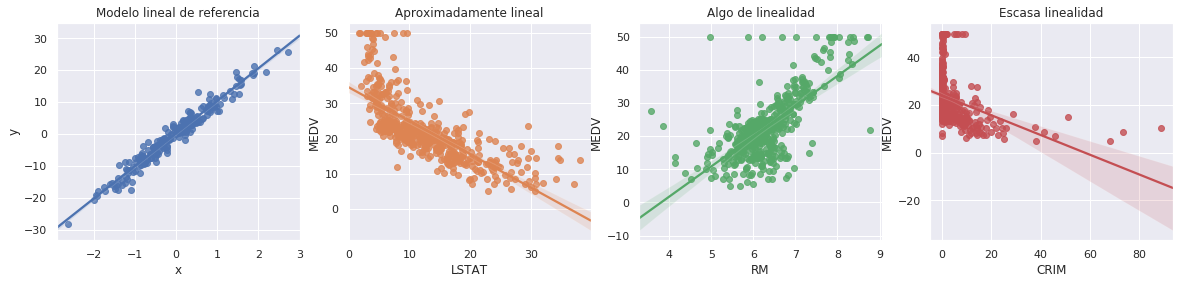

In [41]:
fig,axes = plt.subplots(1,4,figsize=(20,4))
sns.regplot(x="x", y="y", data=toy_df, order=1,ax=axes[0]).set_title("Modelo lineal de referencia")
sns.regplot(x="LSTAT", y="MEDV", data=boston, order=1,ax=axes[1]).set_title("Aproximadamente lineal")
sns.regplot(x="RM", y="MEDV", data=boston, order=1,ax=axes[2]).set_title("Algo de linealidad")
sns.regplot(x="CRIM", y="MEDV", data=boston, order=1,ax=axes[3]).set_title("Escasa linealidad");

En el último caso, aplicar log() a la relación entre criminalidad y MEDV puede mejorar la linealidad.

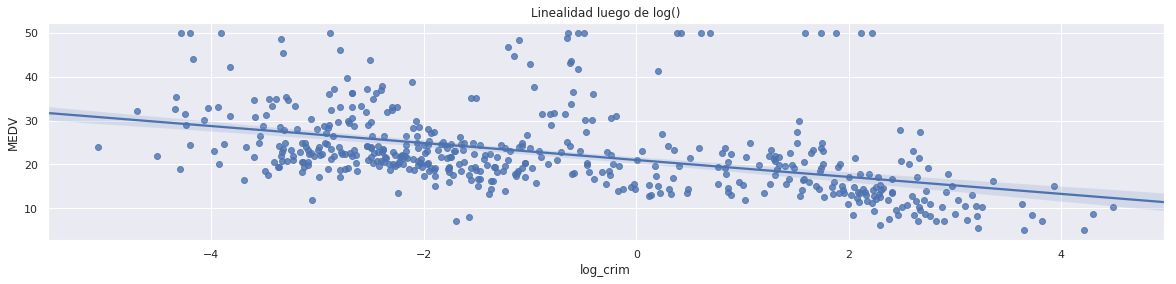

In [42]:
fig,axes = plt.subplots(1,1,figsize=(20,4))
boston['log_crim'] = np.log(boston['CRIM'])
sns.regplot(x="log_crim", y="MEDV", data=boston, order=1,ax=axes).set_title("Linealidad luego de log()");

Estudio de residuales.

In [43]:
def plot_lr_residuals(df,indep_var,dep_var,title):
    # Crear y entrenar modelo LR
    lr = LinearRegression()
    lr.fit(df[indep_var].to_frame(), df[dep_var])
    
    # Predecir y calcular error
    y_pred = lr.predict(df[indep_var].to_frame())
    error = df[dep_var] - y_pred 

    fig,axes = plt.subplots(1,3,figsize=(20,4))
    
    axes[0].set_title('Predicciones vs valor real')
    axes[0].scatter(x=y_pred, y=df[dep_var])
    axes[0].set_xlabel('Predicciones')
    axes[0].axes.set_ylabel('Valor real');

    axes[1].set_title('Residuales')
    axes[1].scatter(y=error, x=df[dep_var])
    axes[1].set_ylabel('Residuales')
    axes[1].set_xlabel("Variable independiente ({})".format(indep_var))
    
    axes[2].set_title('Distribución de residuales')    
    axes[2].set_xlabel('Residuales');
    axes[2].set_ylabel('Frecuencia');
    sns.distplot(error, bins=20,ax=axes[2])    
    
    fig.suptitle(title)

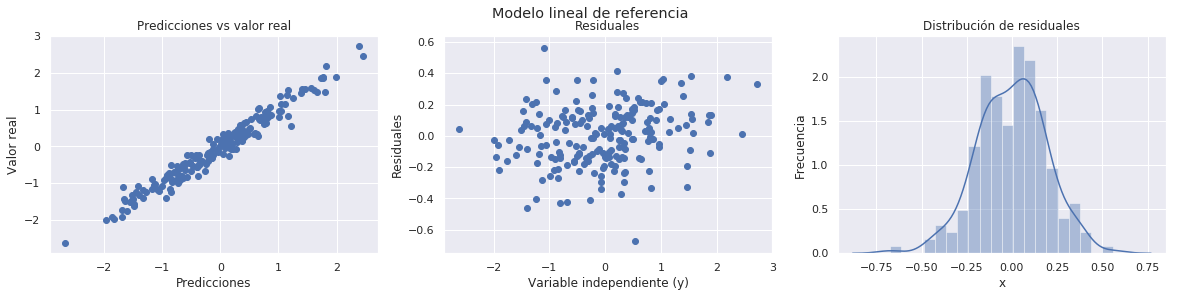

In [44]:
# Modelo lineal de referencia
plot_lr_residuals(toy_df,'y','x','Modelo lineal de referencia')

Observaciones:
- Las predicciones vs el valor real se trazan una recta de 45 grados.
- Los residuales tienen una distribución normal.

En los casos que siguen la relación lineal es más débil, o casi inexistente (ej: CRIM).

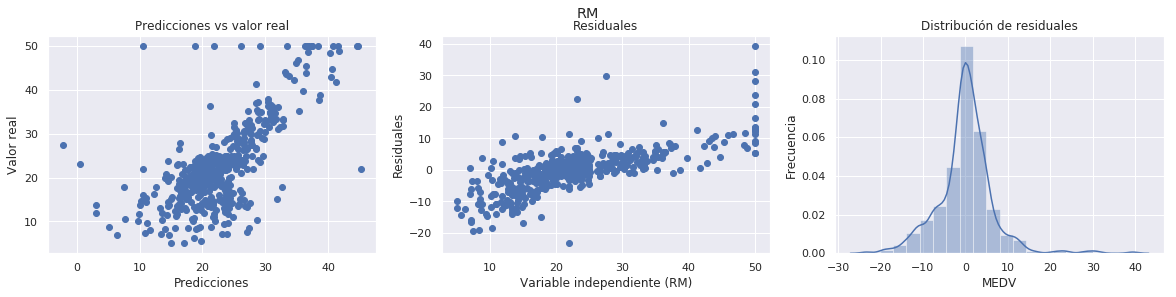

In [45]:
plot_lr_residuals(boston,'RM','MEDV','RM')

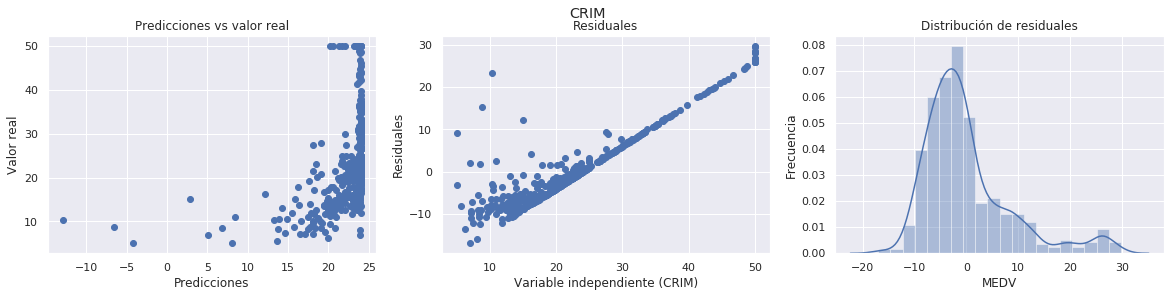

In [46]:
plot_lr_residuals(boston,'CRIM','MEDV','CRIM')

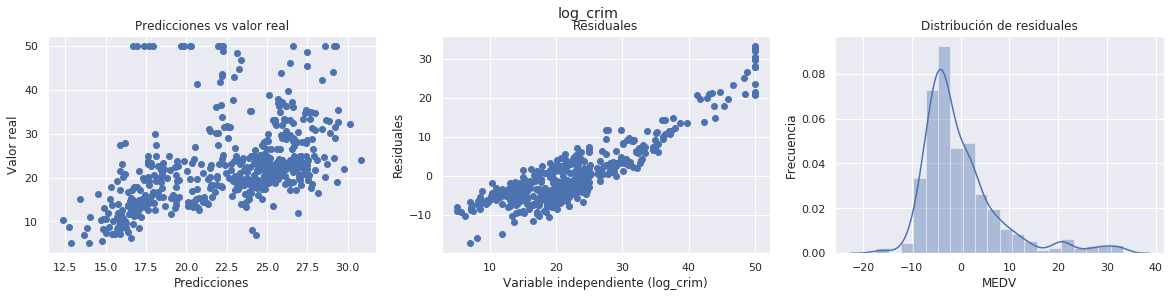

In [47]:
plot_lr_residuals(boston,'log_crim','MEDV','log_crim')

##### 2.3.2 Normalidad

Estudio de normalidad por:
- Histogramas
- QQ Plots

###### 2.3.2.1 Histogramas

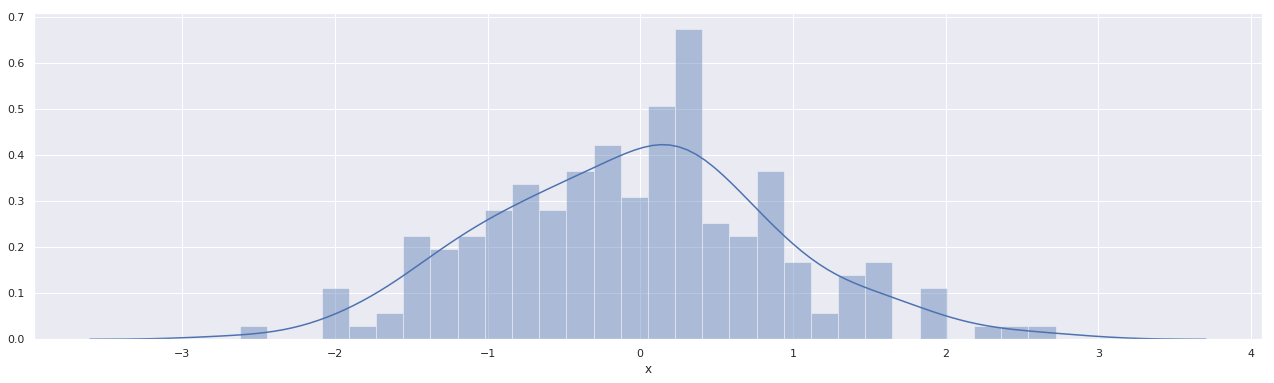

In [48]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
sns.distplot(toy_df['x'], bins=30,ax=axes);

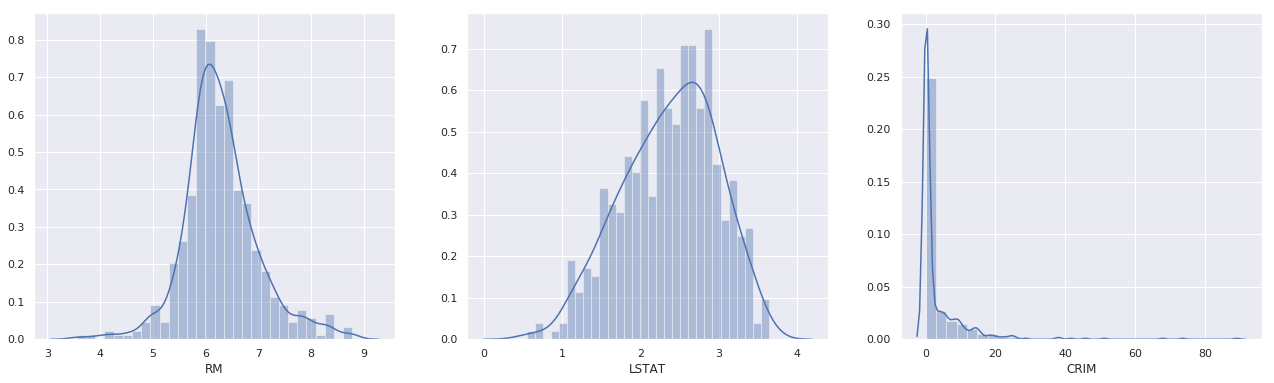

In [49]:
fig,axes=plt.subplots(1,3,figsize=(22,6))
sns.distplot(boston['RM'], bins=30,ax=axes[0])
sns.distplot(np.log(boston['LSTAT']), bins=30,ax=axes[1]);
sns.distplot(boston['CRIM'], bins=30,ax=axes[2]);

###### 2.3.2.2 Q-Q Plots

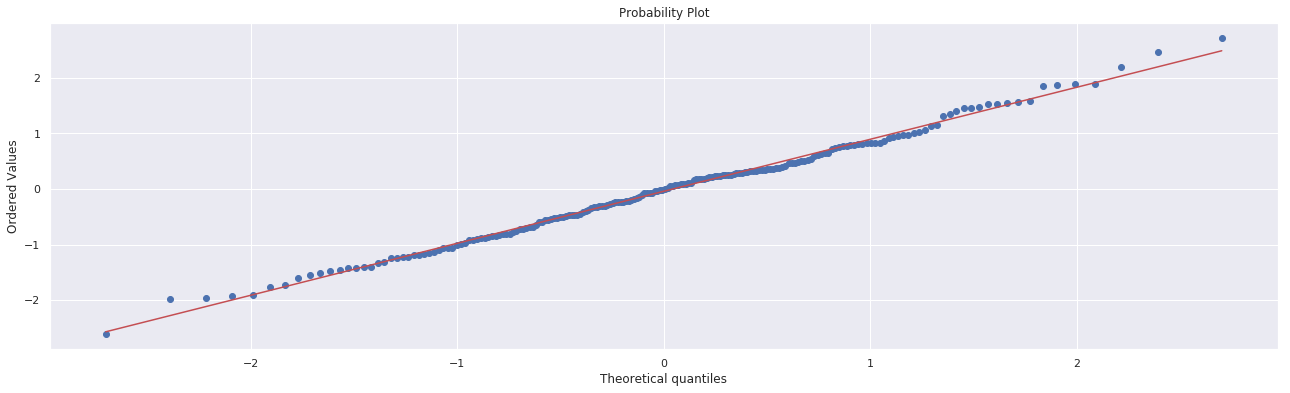

In [50]:
fig,axes=plt.subplots(1,1,figsize=(22,6))
stats.probplot(toy_df['x'], dist="norm", plot=axes);

Text(0.5, 1.0, 'log(CRIM)')

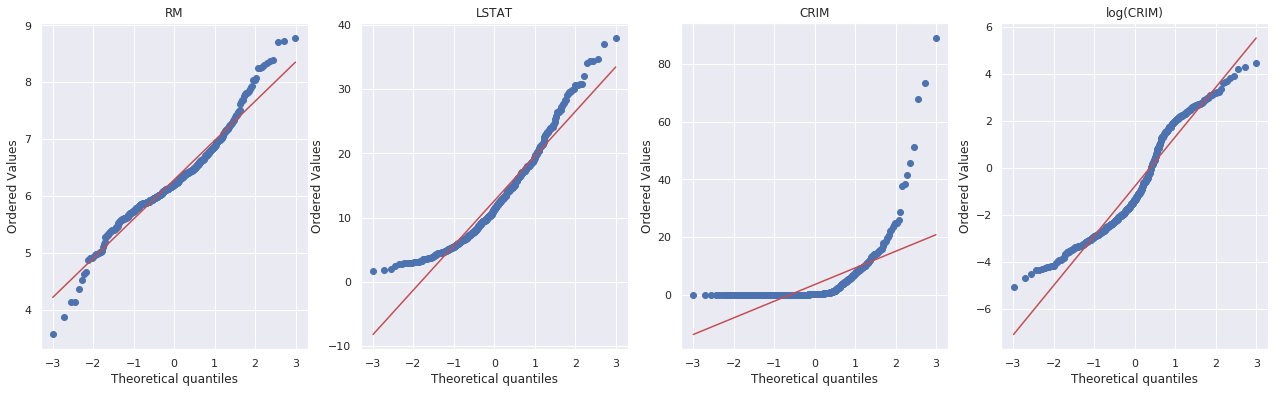

In [51]:
fig,axes=plt.subplots(1,4,figsize=(22,6))
stats.probplot(boston['RM'], dist="norm", plot=axes[0])
axes[0].set_title("RM")

stats.probplot(boston['LSTAT'], dist="norm", plot=axes[1])
axes[1].set_title("LSTAT")

stats.probplot(boston['CRIM'], dist="norm", plot=axes[2])
axes[2].set_title("CRIM")

stats.probplot(np.log(boston['CRIM']), dist="norm", plot=axes[3]);
axes[3].set_title("log(CRIM)")

##### 2.3.3 Multi-colinearidad

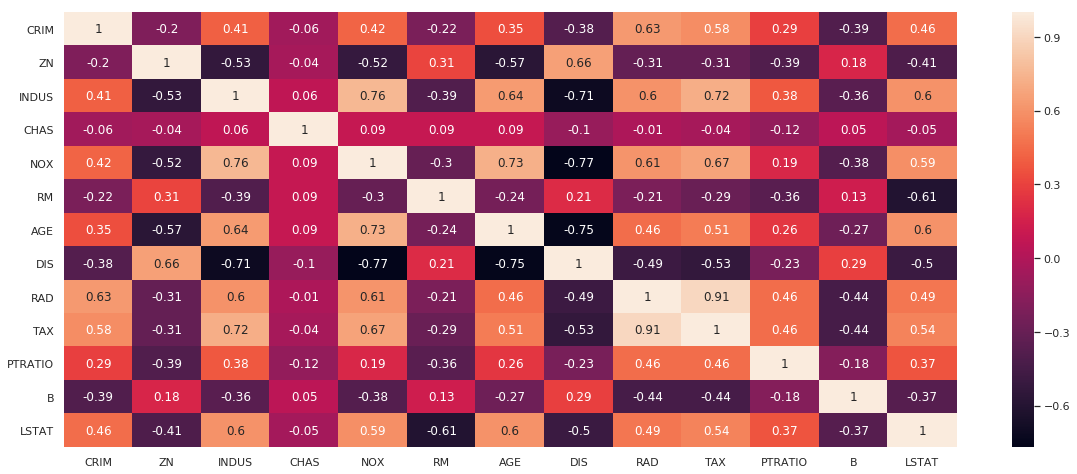

In [52]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = boston[boston_dataset.feature_names].corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

Observaciones:
- En los ejes X e Y se encuentran las variables del dataset. 
- Cada celda contiene el resultado de correlación entre dos variables (recordar que 1/-1 es alto y 0 es para variables independientes).
- Por ejemplo, se puede ver que:
    - LSTAT vs CRIM=0.46 tienen un grado bajo de correlación.
    - RAD y TAX=0.91
    - NOX y DIS=-0.71.

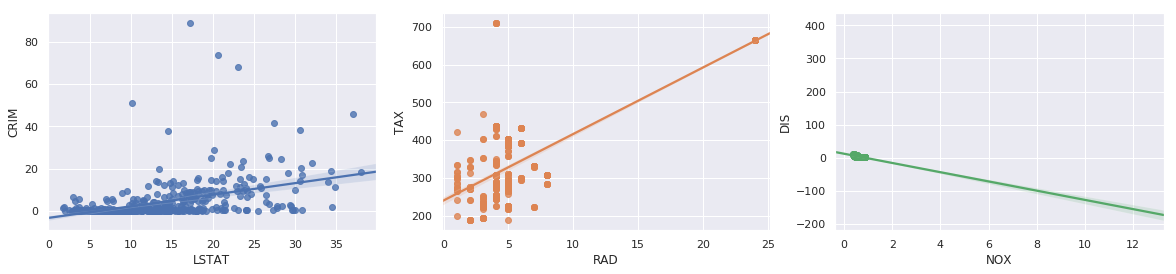

In [53]:
fig,axes = plt.subplots(1,3,figsize=(20,4))
sns.regplot(x="LSTAT", y="CRIM", data=boston, order=1,ax=axes[0])
sns.regplot(x="RAD", y="TAX", data=boston, order=1,ax=axes[1])
sns.regplot(x="NOX", y="DIS", data=boston, order=1,ax=axes[2]);

Observación:
- La correlación entre DIS y NOX viola el supuesto de no-colinealidad, por lo tanto la acción conveniente es eliminar alguna de las dos variables.

##### 2.3.4 Homocedasticidad

Homo=igual, cedasticidad=varianza

> cedasticidad:

> En estadística, la palabra cedasticidad forma parte de homocedasticidad y heterocedasticidad. 
> Procede del griego > σκεδασις (skedasis), y al incorporarse al español ha de hacerse según 
> las normas de adaptación de términos griegos (ke pasa a ce y la s líquida desaparece), 
> lo que en este caso da cedasticidad. Con la unión de los prefijos se obtienen las formas dichas.
> En inglés, sin embargo, la s líquida se conserva, lo que da skedasticity (o scedasticity), y de ahí homoskedasticity y heteroskedasticity (o homoscedasticity y heteroscedasticity).

Fuente: Real Academia de Ciencias Exactas, Físicas y Naturales: Vocabulario científico y técnico, Espasa, 1996.

Formas de identificar si se cumple homocedasticidad:

- Realizar un modelo de regresión lineal incluyendo todas las variables, calcular los residuales, y reprentarlos en un gráfico para cada una de las variables independientes. Si la distribución de los residuales es homogenea para todos los valores, entonces las variables son homocedásticas.
- Gráfico de residuales.
- Tests (no se muestran aquí):
    - Levene
    - Barlett
    - Goldfeld-Quandt

**Ejemplo para dataset de Boston**

Pasos:
- Entrenar un modelo de regresión lineal y graficar los residuales.
- Transfomar las variables, reentrenar el modelo de regresión lineal y ver el efecto en los residuales.

In [54]:
# Para almacenar resultados
results = {}

**Ensayo nro 1. Entrenamiento de modelo sin transformar variables (baja homocedasticidad)**

Cargar dataset por si quedaron variables modificadas de pruebas anteriores.

In [55]:
# Volver a cargar el dataset
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

Particionar dataset en train y test.

In [56]:
independent_vars = ['RM', 'LSTAT', 'CRIM']
dependent_var = 'MEDV'
X_train, X_test, y_train, y_test = train_test_split(
    boston[independent_vars],
    boston[dependent_var],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

Estandarización (se explica más adelante).

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Entrenamiento de LR y registro de resultados.

In [58]:
lr = LinearRegression()
lr.fit(scaler.transform(X_train), y_train)
y_pred_train = lr.predict(scaler.transform(X_train))
y_pred_test = lr.predict(scaler.transform(X_test))

mse_no_tx_train = mean_squared_error(y_train, y_pred_train)
mse_no_tx_test = mean_squared_error(y_test, y_pred_test)

print('MSE: Train: {}, Test: {}'.format(mse_no_tx_train,mse_no_tx_test))
results["no_tx_train"] = {"mse":mse_no_tx_train}
results["no_tx_test"] = {"mse":mse_no_tx_test}

MSE: Train: 28.603232128198893, Test: 33.20006295308442


Estudio de residuales.

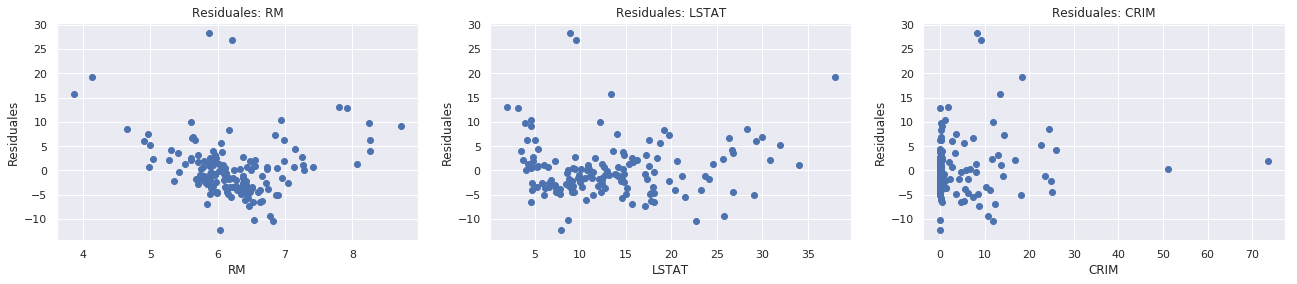

In [61]:
error = y_test - y_pred_test

fig,axes = plt.subplots(1,len(independent_vars),figsize=(22,4))
for i,v in enumerate(independent_vars):
    axes[i].scatter(x=X_test[v], y=error)
    axes[i].set_xlabel(v)
    axes[i].set_ylabel("Residuales")
    axes[i].set_title("Residuales: {}".format(v))

Observaciones:
- Para LSTAT la distribución de residuales es aproximadamente homogénea
- Para RM los valores bajos y altos tienen mayor error.

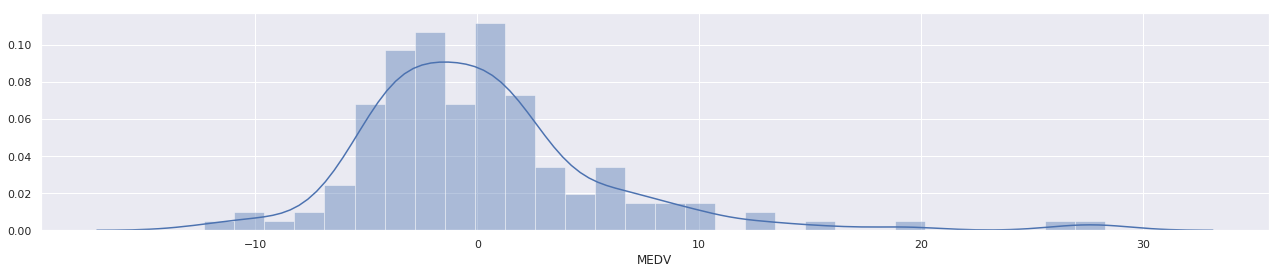

In [64]:
fig,axes = plt.subplots(1,1,figsize=(22,4))
sns.distplot(error, bins=30,ax=axes);

La distribución de los residuales se aproxima a una normal, pero no termina de serlo. Hay más valores altos hacia el final de la distribución.

A continuación se transformarán las variables, y se verá el efecto en el modelo de regresión lineal.

**Ensayo nro 2. Entrenamiento de modelo transformando variables para mejorar homocedasticidad**

In [106]:
# Volver a cargar el dataset
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

Transformaciones.

In [107]:
boston['LSTAT'] = np.log(boston['LSTAT'])
boston['CRIM'] = np.log(boston['CRIM'])

El resto de los pasos son los mismos que en el caso anterior.

In [108]:
independent_vars = ['RM', 'LSTAT', 'CRIM']
dependent_var = 'MEDV'
X_train, X_test, y_train, y_test = train_test_split(
    boston[independent_vars],
    boston[dependent_var],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [110]:
lr = LinearRegression()
lr.fit(scaler.transform(X_train), y_train)
y_pred_train = lr.predict(scaler.transform(X_train))
y_pred_test = lr.predict(scaler.transform(X_test))

mse_tx_train = mean_squared_error(y_train, y_pred_train)
mse_tx_test = mean_squared_error(y_test, y_pred_test)

print('MSE: Train: {}, Test: {}'.format(mse_tx_train,mse_tx_test))
results["tx_train"] = {"mse":mse_tx_train}
results["tx_test"] = {"mse":mse_tx_test}

MSE: Train: 23.153756985456162, Test: 28.724303390091038


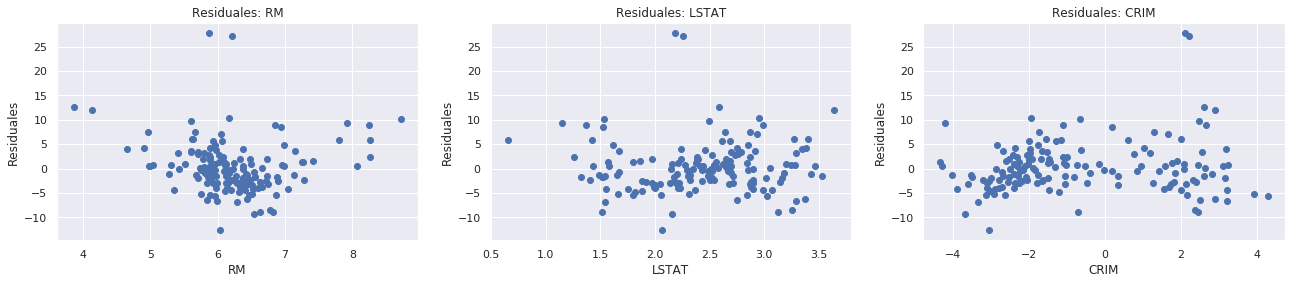

In [72]:
error = y_test - y_pred_test

fig,axes = plt.subplots(1,len(independent_vars),figsize=(22,4))
for i,v in enumerate(independent_vars):
    axes[i].scatter(x=X_test[v], y=error)
    axes[i].set_xlabel(v)
    axes[i].set_ylabel("Residuales")
    axes[i].set_title("Residuales: {}".format(v))

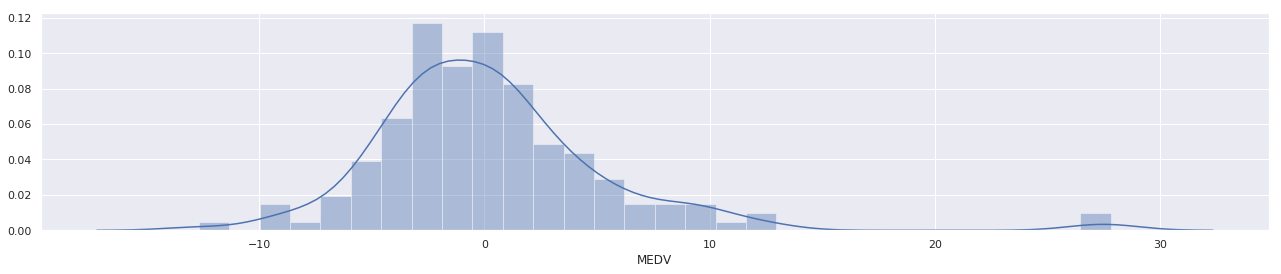

In [73]:
fig,axes = plt.subplots(1,1,figsize=(22,4))
sns.distplot(error, bins=30,ax=axes);

In [74]:
df_results = pd.DataFrame(results)
df_results

,no_tx_train,no_tx_test,tx_train,tx_test
mse,28.603232,33.200063,23.153757,28.724303


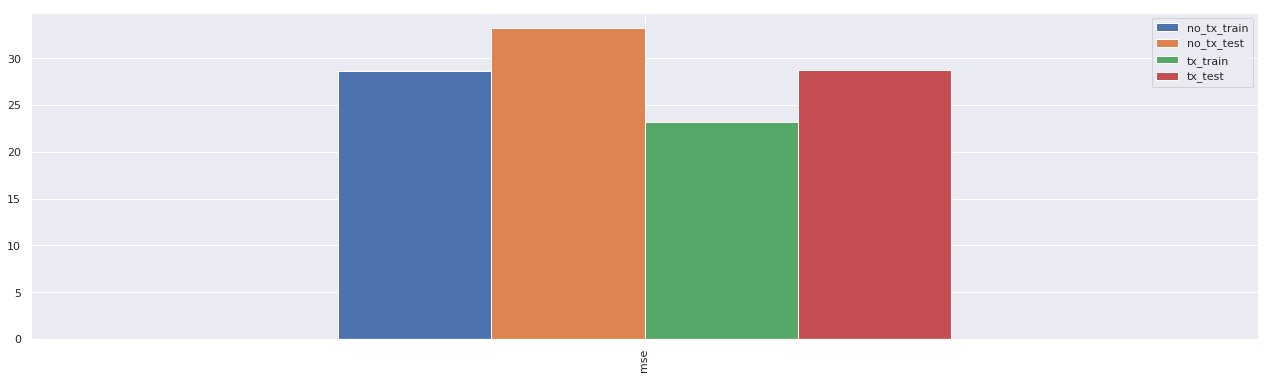

In [75]:
df_results.plot.bar(figsize=(22,6));

#### 2.5 Valores extremos

Función para gráficos de diagnóstico.

In [76]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.distplot(df[variable], bins=30,ax=axes[0])
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

Casos con distribución normal.

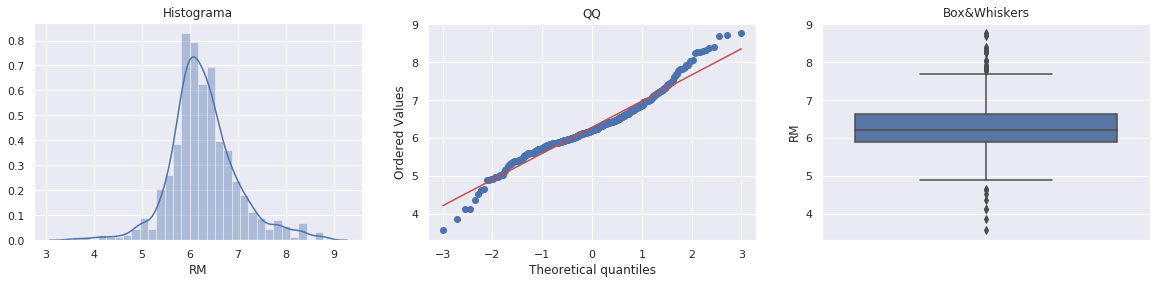

In [77]:
outlier_diagnostic_plots(boston, 'RM')

En estos casos se puede utilizar como regla de detección de outliers aquellos valores que estén más alejados de 3 desvíos estándar.

In [78]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597748, 4.176782957105809)

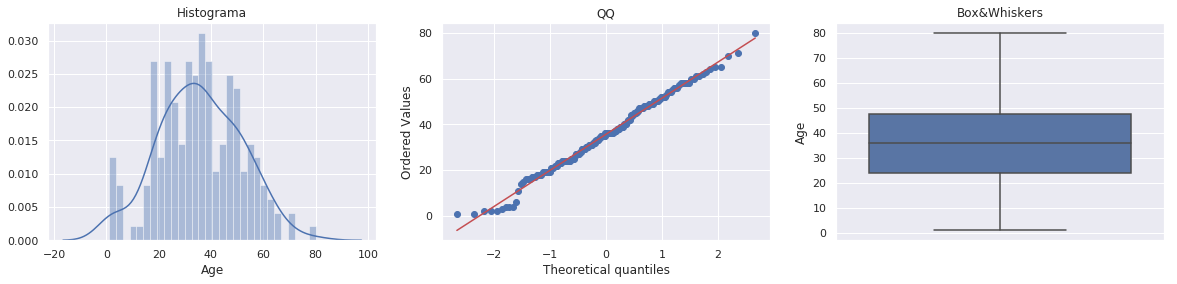

In [79]:
outlier_diagnostic_plots(df_titanic.dropna(), 'Age')

In [80]:
upper_boundary, lower_boundary = find_normal_boundaries(df_titanic.dropna(), 'Age')
upper_boundary, lower_boundary

(82.60602413005735, -11.25717167104095)

Casos con distribución con oblicuidad.

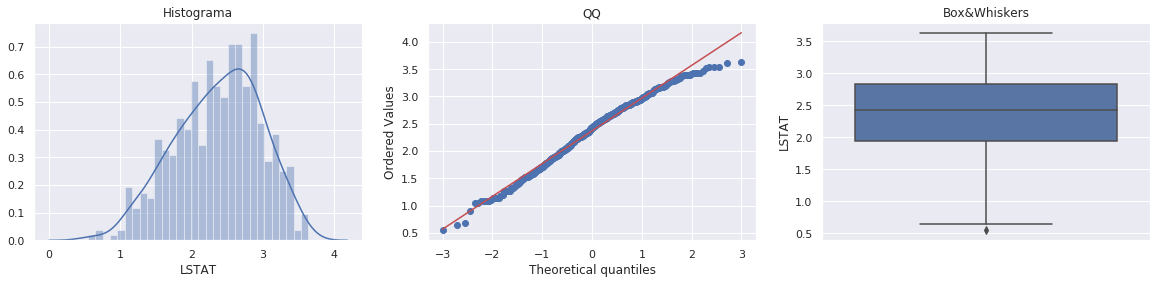

In [81]:
outlier_diagnostic_plots(boston, 'LSTAT')

In [82]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [83]:
upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(4.168312684952512, 0.6009792452892662)

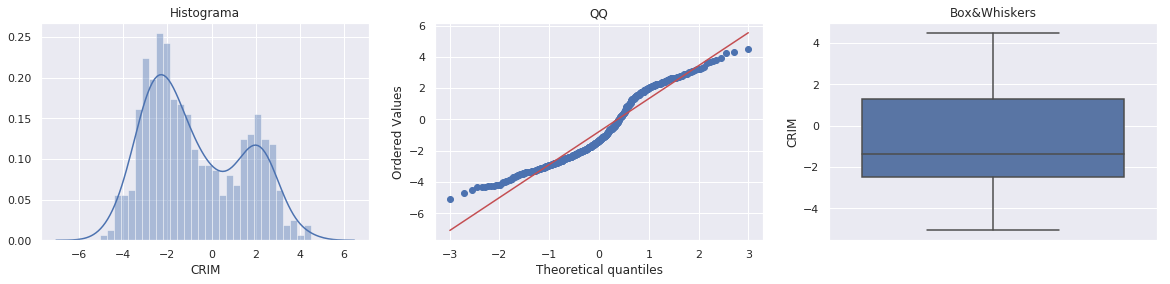

In [84]:
outlier_diagnostic_plots(boston, 'CRIM')

In [85]:
upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 1.5)
upper_boundary, lower_boundary

(7.006030850933922, -8.204399430936453)

#### 2.6 Magnitud/escala.

En este ejemplo, se entrenaran distintos modelos con una variante del dataset en la que se modifica la magnitud de las variables de entrada y otra versión en la que no.

El objetivo es ver qué modelos son afectados por la escala de las variables de entrada.

Este ejemplo utiliza el dataset de titanic con las variables:

Independientes (X):
- Clase del pasajero
- Edad
- Tarifa

Objetivo (y):
- Sobrevivió?

In [117]:
cols = ['Pclass', 'Age', 'Fare', 'Survived']
df_titanic[cols].describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


Se observa que los rangos de las variables independientes tienen rangos bastante disímiles (de 2 a 512).

In [118]:
for col in cols:
    print(col, 'rango: ', df_titanic[col].max() - df_titanic[col].min())

Pclass rango:  2
Age rango:  79.58
Fare rango:  512.3292
Survived rango:  1


En este paso se particiona el dataset en entrenamiento y test.

In [119]:
feature_cols=['Pclass', 'Age', 'Fare']
X_train, X_test, y_train, y_test = train_test_split(
    df_titanic[feature_cols].fillna(0),
    df_titanic.Survived,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

A una variante se le aplica la normalización a 0-1 y a otra se la deja intacta.

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Dataset sin escalar. Promedio: ', X_train.values.mean(axis=0))
print('Dataset sin escalar. Desvío estándar: ', X_train.values.std(axis=0))
print('Dataset sin escalar. Minimo: ', X_train.values.min(axis=0))
print('Dataset sin escalar. Maximo: ', X_train.values.max(axis=0))

print('Dataset escalado. Promedio: ', X_train_scaled.mean(axis=0))
print('Dataset escalado. Desvío estándar: ', X_train_scaled.std(axis=0))
print('Dataset escalado. Minimo: ', X_train_scaled.min(axis=0))
print('Dataset escalado. Maximo: ', X_train_scaled.max(axis=0))

Dataset sin escalar. Promedio:  [ 2.28731942 24.10513644 32.45827255]
Dataset sin escalar. Desvío estándar:  [ 0.83998187 17.58682197 48.21891267]
Dataset sin escalar. Minimo:  [1. 0. 0.]
Dataset sin escalar. Maximo:  [  3.      80.     512.3292]
Dataset escalado. Promedio:  [0.64365971 0.30131421 0.06335433]
Dataset escalado. Desvío estándar:  [0.41999093 0.21983527 0.09411705]
Dataset escalado. Minimo:  [0. 0. 0.]
Dataset escalado. Maximo:  [1. 1. 1.]


In [121]:
from sklearn.base import clone

# Nota: LR con C grande para evitar regularización
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("RandomForest", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("SVM", SVC(random_state=44, probability=True, gamma='auto')),    
    ("LogistiRegression", LogisticRegression(random_state=42, C=1000, solver='lbfgs'))
]

results = {}
for m in models:
    # De la doc de SKlearn:
    # Clone does a deep copy of the model in an estimator without actually copying attached data. 
    # It yields a new estimator with the same parameters that has not been fitted on any data.
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    # Versión sin escalar features    
    model.fit(X_train, y_train)
    pred_train = model.predict_proba(X_train)
    pred_test = model.predict_proba(X_test)
    
    results[model_name]["no_scale_train"] = roc_auc_score(y_train, pred_train[:,1])
    results[model_name]["no_scale_test"] =non_red_score_test = roc_auc_score(y_test, pred_test[:,1])
    
    # Versión con escalado de features
    model = clone(m[1])
    model.fit(X_train_scaled, y_train)
    pred_train = model.predict_proba(X_train_scaled)
    pred_test = model.predict_proba(X_test_scaled)
    
    results[model_name]["scale_train"] = roc_auc_score(y_train, pred_train[:,1])
    results[model_name]["scale_test"] =non_red_score_test = roc_auc_score(y_test, pred_test[:,1])

df_results = pd.DataFrame(results).T
df_results

,no_scale_test,no_scale_train,scale_test,scale_train
KNN,0.675833,0.829489,0.712440,0.845616
RandomForest,0.760208,0.991351,0.760923,0.991340
SVM,0.676756,0.901700,0.699286,0.703710
LogistiRegression,0.708095,0.713482,0.708095,0.713493


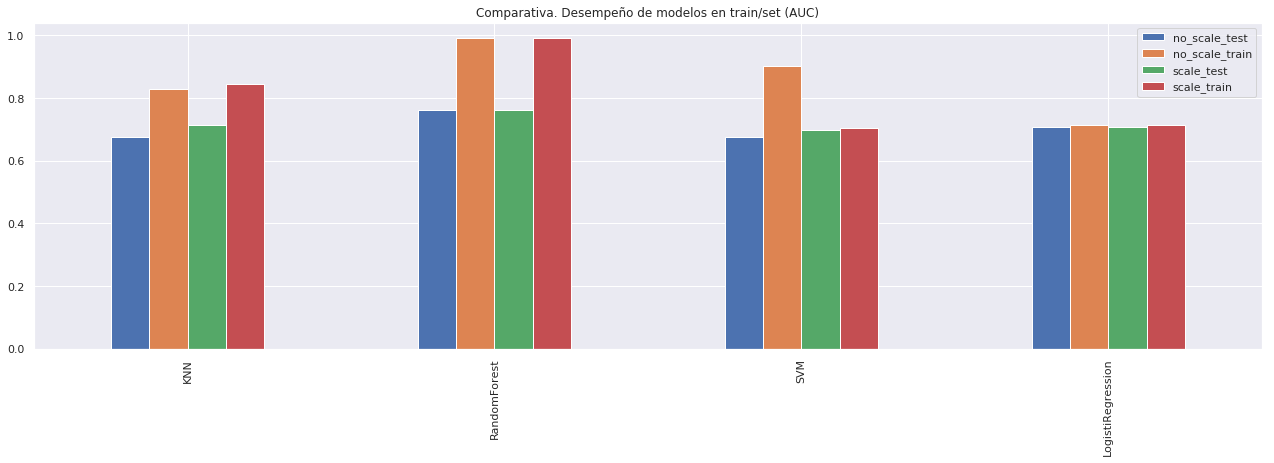

In [122]:
df_results.plot.bar(figsize=(22,6)).set_title("Comparativa. Desempeño de modelos en train/set (AUC)");

In [123]:
df_results["improvement"] = (df_results["scale_test"]-df_results["no_scale_test"])
df_results.sort_values(by='improvement',ascending=False)

,no_scale_test,no_scale_train,scale_test,scale_train,improvement
KNN,0.675833,0.829489,0.712440,0.845616,0.036607
SVM,0.676756,0.901700,0.699286,0.703710,0.022530
RandomForest,0.760208,0.991351,0.760923,0.991340,0.000714
LogistiRegression,0.708095,0.713482,0.708095,0.713493,0.000000


Conclusiones:
- En algunos algoritmos como KNN y SVM normalizar los datos tiene un efecto positivo no despreciable (3-5%)
- En los algoritmos basados en árboles como RandomForest o LogisticRegression el efecto en el desempeño es mínimo o nulo.